In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('test_01_converted.csv')
id_list = []
combine = data.groupby(data['id'])
for _id, group in combine:
	id_list.append(_id)

mjd_list = data['mjd']
mjd_max = np.nanmax(mjd_list)
mjd_min = np.nanmin(mjd_list)
# max_obj = 4000

print("the time range is from %d to %d (day)"% (mjd_min,mjd_max))
use_mjd = [x for x in range(int(mjd_min),int(mjd_max))]

# pick max_obj number of objects and sort them by their redshift
# obj = None
# n = 0
# num_obj =0
# while n < len(data):
#     if data['object_id'][n]!=obj:
#         obj=data['object_id'][n]
#         num_obj +=1
#     n +=1

#convert to the obj id in the plot for convenience
map_obj = {}
n = 0
for i in id_list:
    map_obj[i] = n
    n +=1
    

the time range is from 59582 to 60674 (day)


In [20]:
n = 0
obj = None
data_mag = []

df = []
for i in id_list:
    mag_list = []
    ind_list = data[data.id == i].index.tolist()
    mjd_exit_list = data['mjd'][ind_list].tolist()
    mjd_exit_list = [int(x) for x in mjd_exit_list]
    
    m = 0
    while m<len(use_mjd):
        if use_mjd[m] in mjd_exit_list:
            mag = data['u'][ind_list[mjd_exit_list.index(use_mjd[m])]]
            if mag == None:
                mag = np.nan
            mag_list.append(mag)
        else:
            mag_list.append(np.nan)
        m +=1
    df.append(mag_list)

(32926, 1092)
[5.0000e-01 8.5000e+00 1.6500e+01 2.4500e+01 3.2500e+01 4.0500e+01
 4.8500e+01 5.6500e+01 6.4500e+01 7.2500e+01 8.0500e+01 8.8500e+01
 9.6500e+01 1.0450e+02 1.1250e+02 1.2050e+02 1.2850e+02 1.3650e+02
 1.4450e+02 1.5250e+02 1.6050e+02 1.6850e+02 1.7650e+02 1.8450e+02
 1.9250e+02 2.0050e+02 2.0850e+02 2.1650e+02 2.2450e+02 2.3250e+02
 2.4050e+02 2.4850e+02 2.5650e+02 2.6450e+02 2.7250e+02 2.8050e+02
 2.8850e+02 2.9650e+02 3.0450e+02 3.1250e+02 3.2050e+02 3.2850e+02
 3.3650e+02 3.4450e+02 3.5250e+02 3.6050e+02 3.6850e+02 3.7650e+02
 3.8450e+02 3.9250e+02 4.0050e+02 4.0850e+02 4.1650e+02 4.2450e+02
 4.3250e+02 4.4050e+02 4.4850e+02 4.5650e+02 4.6450e+02 4.7250e+02
 4.8050e+02 4.8850e+02 4.9650e+02 5.0450e+02 5.1250e+02 5.2050e+02
 5.2850e+02 5.3650e+02 5.4450e+02 5.5250e+02 5.6050e+02 5.6850e+02
 5.7650e+02 5.8450e+02 5.9250e+02 6.0050e+02 6.0850e+02 6.1650e+02
 6.2450e+02 6.3250e+02 6.4050e+02 6.4850e+02 6.5650e+02 6.6450e+02
 6.7250e+02 6.8050e+02 6.8850e+02 6.9650e+02 7.0

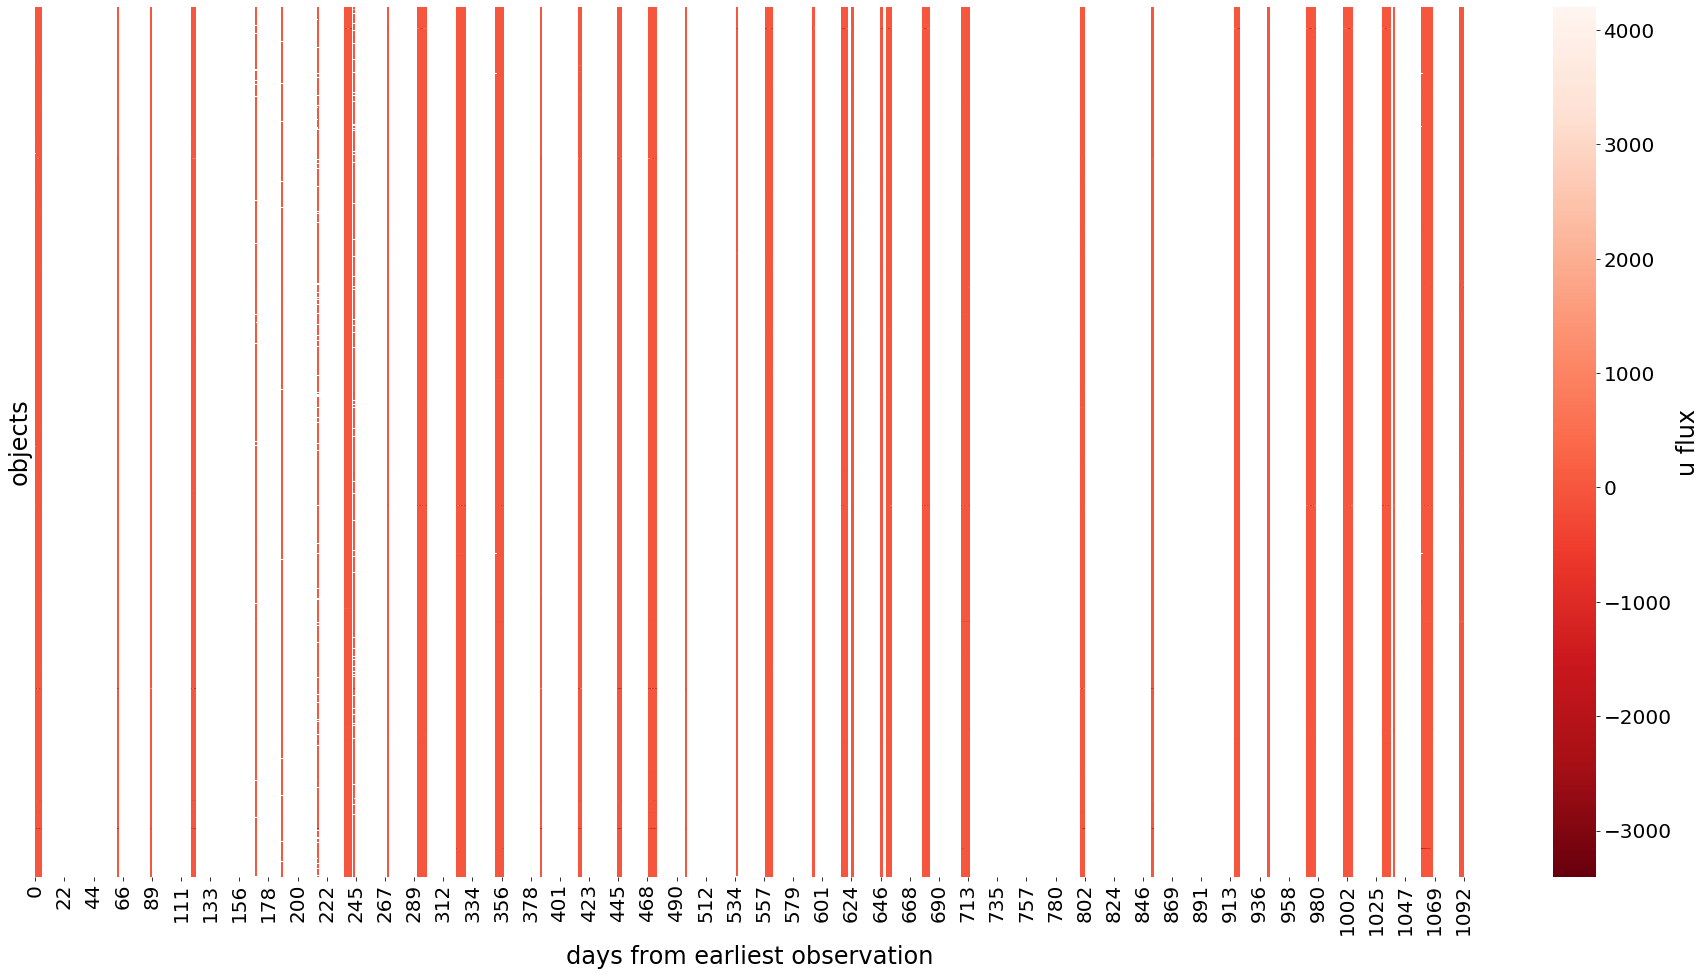

In [21]:
# df2 = pd.DataFrame(np.array(df))
test = np.array(df)
print(test.shape)
f, ax = plt.subplots(figsize=(32, 16))
# plt.figure(figsize = (32,16))
ax = sns.heatmap(test, cmap='Reds_r', label='u flux')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# sns.set_label('g magnitude',fontsize=24)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
#设置colorbar的label文本和字体大小
cbar = ax.collections[0].colorbar
cbar.set_label('u flux',fontsize=24)

locs, labels = plt.xticks()
# print(locs)
# print(labels)
x_tick = np.linspace(0,1092,50)
x_label = [str(int(x)) for x in x_tick]
# print(x_tick)
# print(x_label)
plt.xticks(x_tick, x_label, fontsize=20)
plt.yticks([])

plt.xlabel('days from earliest observation', fontsize=24, labelpad=10)
plt.ylabel('objects', fontsize=24)
plt.savefig('heatmap_u_test01.png')

/Users/sherrysheng/opt/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/sherrysheng/opt/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/sherrysheng/opt/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/sherrysheng/opt/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


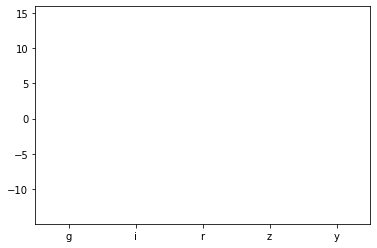

In [15]:
data = pd.read_csv('test_01_converted.csv')
labels = 'g', 'i', 'r', 'z','y'
pre_data = data[(data['g']!=None) & (data['u']!=None) & (data['i']!=None) & (data['r']!=None) & (data['z']!=None)]

plt.boxplot([pre_data['g'],pre_data['i'], pre_data['r'], pre_data['z'],pre_data['y']], labels=labels)
plt.show()